**1. What is entropy and information gain?**

- Entropy measures the impurity or randomness in the data.
- Information gain is the reduction in entropy after a dataset is split based on a feature — it helps decide which feature to split on in a decision tree.

**2. Explain the difference between Gini Index and Entropy.**

- Gini Index measures how often a randomly chosen element would be incorrectly labeled.
- Entropy uses logarithms to measure impurity.
Gini is simpler and faster, while entropy is more informative but slightly slower.

**3. How can a decision tree overfit? How can this be avoided?**

- A decision tree overfits when it learns noise or patterns specific to the training data, making it perform poorly on new data.
This can be avoided by pruning, setting max depth, min samples per leaf, or using ensemble methods like Random Forest.

- Task 5: Decision Tree on Titanic Dataset 
- ● Load Titanic dataset (or use a similar dataset). 
- ● Preprocess (handle missing values, encode categorical variables). 
- ● Train a DecisionTreeClassifier. 
- ● Visualize the decision tree using plot_tree. 
- ● Evaluate the model using accuracy and confusion matrix. 

Accuracy:-- 0.7821229050279329
Confusion Matrix
 [[83 22]
 [17 57]]


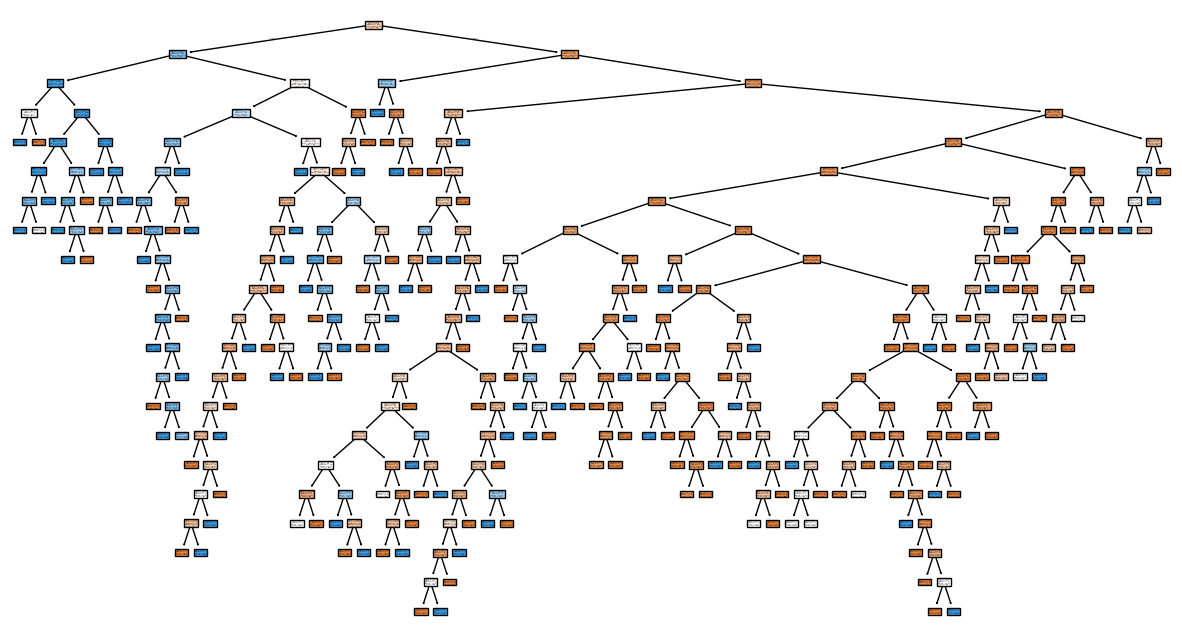

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

enc = LabelEncoder()
df['Sex'] = enc.fit_transform(df['Sex'])
df['Embarked'] = enc.fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1)
y = df['Survived']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(Xtrain, ytrain)

pred = clf.predict(Xtest)
print("Accuracy:--",accuracy_score(ytest, pred))
print("Confusion Matrix\n", confusion_matrix(ytest, pred))
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


- Task 6: Model Tuning 
- ● Use parameters like: 
- ○ max_depth 
- ○ min_samples_split 
- ● Show how performance changes. 
- ● Plot training vs testing accuracy to visualize overfitting. 


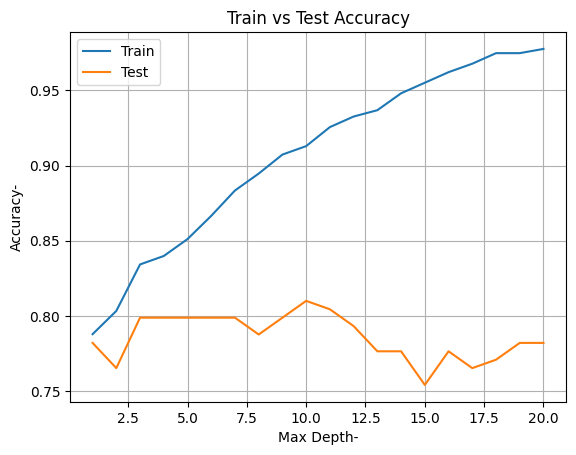

In [2]:
depth_list = range(1, 21)
train_acc = []
test_acc = []

for d in depth_list:
    tree = DecisionTreeClassifier(max_depth=d, min_samples_split=2, random_state=42)
    tree.fit(Xtrain, ytrain)
    train_acc.append(accuracy_score(ytrain, tree.predict(Xtrain)))
    test_acc.append(accuracy_score(ytest, tree.predict(Xtest)))

plt.plot(depth_list, train_acc, label='Train')
plt.plot(depth_list, test_acc, label='Test')
plt.xlabel("Max Depth-")
plt.ylabel("Accuracy-")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()
